In [1]:
# import packages
import pandas as pd
import numpy as np


In [2]:
# read raw data
df = pd.read_csv('data/data_raw.csv')
print(df.shape)

# drop duplicate observations
df = df.drop(labels=['index'], axis=1)
df = df.drop_duplicates()
print(df.drop_duplicates().shape)

# delete unwanted columns
list_unwanted_variables = ['Job Title', 'Salary Estimate', 'Job Description', 'Company Name', 'Location',
                          'Headquarters', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 
                          'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary', 'company_txt', 'flink', 
                           'mongo', 'google_an', 'job_title_sim']
df_subset = df.drop(labels = list_unwanted_variables, axis=1)

print(df_subset.columns)

# export data subset
df_subset.to_csv('data/data_subset.csv')

(742, 42)
(467, 41)
Index(['Rating', 'Size', 'Avg Salary(K)', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'seniority_by_title', 'Degree'],
      dtype='object')


## Edit the previously subsetted columns

In [3]:
#read in the subset data, set first column as index
df = pd.read_csv('data/data_subset.csv', index_col=0)
#visualize the first 5 entried
df.head()

,Rating,Size,Avg Salary(K),Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,seniority_by_title,Degree
0,3.8,501 - 1000,72.0,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,na,M
1,3.4,10000+,87.5,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,na,M
2,4.8,501 - 1000,85.0,FL,11,1,1,0,1,1,1,0,0,0,0,0,0,0,na,M
3,3.8,1001 - 5000,76.5,WA,56,1,0,0,0,0,0,0,0,0,0,0,0,0,na,na
4,2.9,51 - 200,114.5,NY,23,1,0,0,1,1,1,0,0,0,0,0,0,0,na,na


In [4]:
#Check data types
df.dtypes

Rating                float64
Size                   object
Avg Salary(K)         float64
Job Location           object
Age                     int64
Python                  int64
spark                   int64
aws                     int64
excel                   int64
sql                     int64
sas                     int64
keras                   int64
pytorch                 int64
scikit                  int64
tensor                  int64
hadoop                  int64
tableau                 int64
bi                      int64
seniority_by_title     object
Degree                 object
dtype: object

### Create two new columns and drop previously associated columns.  
- visual_software
- ML_software


In [5]:
# Add new column that represents visual softwares
df['visual_software'] = (df["tableau"] == 1) | (df["bi"] == 1)

In [6]:
#check newly created column
df.head(10)

,Rating,Size,Avg Salary(K),Job Location,Age,Python,spark,aws,excel,sql,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,seniority_by_title,Degree,visual_software
0,3.8,501 - 1000,72.0,NM,48,1,0,0,1,0,...,0,0,0,0,0,1,1,na,M,True
1,3.4,10000+,87.5,MD,37,1,0,0,0,0,...,0,0,0,0,0,0,0,na,M,False
2,4.8,501 - 1000,85.0,FL,11,1,1,0,1,1,...,0,0,0,0,0,0,0,na,M,False
3,3.8,1001 - 5000,76.5,WA,56,1,0,0,0,0,...,0,0,0,0,0,0,0,na,na,False
4,2.9,51 - 200,114.5,NY,23,1,0,0,1,1,...,0,0,0,0,0,0,0,na,na,False
5,3.4,201 - 500,95.0,TX,21,1,0,1,1,1,...,0,0,0,0,0,0,1,na,na,True
6,4.1,501 - 1000,73.5,MD,13,0,0,0,1,0,...,0,0,0,0,0,0,0,na,na,False
7,3.8,201 - 500,114.0,CA,16,1,1,1,1,1,...,0,1,0,1,0,0,0,na,M,False
8,3.3,10000+,61.0,NY,7,0,0,0,0,0,...,0,0,0,0,0,0,0,na,P,False
9,4.6,51 - 200,140.0,NY,12,1,1,0,0,0,...,0,0,0,0,0,0,0,na,na,False


In [7]:
# drop columns for tableau and bi
df = df.drop(columns=['tableau', 'bi'])
df.head()

,Rating,Size,Avg Salary(K),Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,seniority_by_title,Degree,visual_software
0,3.8,501 - 1000,72.0,NM,48,1,0,0,1,0,1,0,0,0,0,0,na,M,True
1,3.4,10000+,87.5,MD,37,1,0,0,0,0,0,0,0,0,0,0,na,M,False
2,4.8,501 - 1000,85.0,FL,11,1,1,0,1,1,1,0,0,0,0,0,na,M,False
3,3.8,1001 - 5000,76.5,WA,56,1,0,0,0,0,0,0,0,0,0,0,na,na,False
4,2.9,51 - 200,114.5,NY,23,1,0,0,1,1,1,0,0,0,0,0,na,na,False


In [8]:
# Add new column that represents machine learning softwares
## if either one of "keras, pytorch, scikit, tensor" is 1, we set it as true.
df['ML_software'] = (df["keras"] == 1) | (df["pytorch"] == 1) | (df["scikit"] == 1) | (df["tensor"] == 1)
df.head()



,Rating,Size,Avg Salary(K),Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,seniority_by_title,Degree,visual_software,ML_software
0,3.8,501 - 1000,72.0,NM,48,1,0,0,1,0,1,0,0,0,0,0,na,M,True,False
1,3.4,10000+,87.5,MD,37,1,0,0,0,0,0,0,0,0,0,0,na,M,False,False
2,4.8,501 - 1000,85.0,FL,11,1,1,0,1,1,1,0,0,0,0,0,na,M,False,False
3,3.8,1001 - 5000,76.5,WA,56,1,0,0,0,0,0,0,0,0,0,0,na,na,False,False
4,2.9,51 - 200,114.5,NY,23,1,0,0,1,1,1,0,0,0,0,0,na,na,False,False


In [9]:
# drop columns for keras, pytorch, scikit, tensor.
df = df.drop(columns=['keras', 'pytorch', 'scikit', 'tensor'])
df.head()

,Rating,Size,Avg Salary(K),Job Location,Age,Python,spark,aws,excel,sql,sas,hadoop,seniority_by_title,Degree,visual_software,ML_software
0,3.8,501 - 1000,72.0,NM,48,1,0,0,1,0,1,0,na,M,True,False
1,3.4,10000+,87.5,MD,37,1,0,0,0,0,0,0,na,M,False,False
2,4.8,501 - 1000,85.0,FL,11,1,1,0,1,1,1,0,na,M,False,False
3,3.8,1001 - 5000,76.5,WA,56,1,0,0,0,0,0,0,na,na,False,False
4,2.9,51 - 200,114.5,NY,23,1,0,0,1,1,1,0,na,na,False,False


In [10]:
# convert visual_software and ML_software to dummy variables.
df["visual_software"] = df["visual_software"].astype(int)
df["ML_software"] = df["ML_software"].astype(int)

In [11]:
#reorder and check results
df.columns.tolist()

['Rating',
 'Size',
 'Avg Salary(K)',
 'Job Location',
 'Age',
 'Python',
 'spark',
 'aws',
 'excel',
 'sql',
 'sas',
 'hadoop',
 'seniority_by_title',
 'Degree',
 'visual_software',
 'ML_software']

In [12]:
# create a list of the ideal order
col_order = [
    'Avg Salary(K)', 'Rating', 'Size', 'Job Location','Age', 'Python', 'visual_software', 'ML_software', 'spark', 'aws', 'excel', 'sql', 'sas', 'hadoop', 'seniority_by_title', 'Degree',
 ]

In [13]:
# actually change the order of the df to the ideal order
df = df.reindex(columns = col_order)

In [14]:
df

,Avg Salary(K),Rating,Size,Job Location,Age,Python,visual_software,ML_software,spark,aws,excel,sql,sas,hadoop,seniority_by_title,Degree
0,72.0,3.8,501 - 1000,NM,48,1,1,0,0,0,1,0,1,0,na,M
1,87.5,3.4,10000+,MD,37,1,0,0,0,0,0,0,0,0,na,M
2,85.0,4.8,501 - 1000,FL,11,1,0,0,1,0,1,1,1,0,na,M
3,76.5,3.8,1001 - 5000,WA,56,1,0,0,0,0,0,0,0,0,na,na
4,114.5,2.9,51 - 200,NY,23,1,0,0,0,0,1,1,1,0,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,86.5,4.3,1001 - 5000,NY,22,0,0,0,0,1,1,1,0,0,na,M
700,89.0,3.4,51 - 200,WA,-1,0,0,0,0,0,0,0,0,0,na,na
716,92.0,4.0,501 - 1000,CA,15,0,0,0,0,1,1,0,0,0,sr,M
732,111.0,4.1,1 - 50,CA,14,1,0,1,0,1,1,0,0,0,na,na


In [15]:
df.dtypes

Avg Salary(K)         float64
Rating                float64
Size                   object
Job Location           object
Age                     int64
Python                  int64
visual_software         int32
ML_software             int32
spark                   int64
aws                     int64
excel                   int64
sql                     int64
sas                     int64
hadoop                  int64
seniority_by_title     object
Degree                 object
dtype: object

### Process Job Location
- Create new dummy variable column that organizes states into categories based on the highest salaries and most occurences
- Minor note: in Degree column, change M to MS and P to PHD

In [16]:
# rename salary column and job location column to use underscore
df.rename({'Avg Salary(K)' : 'avg_salary_k', 'Job Location': 'job_location'}, axis=1, inplace=True)

# get top occuring states (by percentage)
states_occurences = df['job_location'].value_counts(normalize=True)
states_occurences[0:9]



CA    0.211991
MA    0.128480
NY    0.100642
VA    0.064240
MD    0.047109
IL    0.047109
PA    0.040685
TX    0.036403
WA    0.032120
Name: job_location, dtype: float64

<AxesSubplot:title={'center':'avg_salary_k'}, xlabel='job_location'>

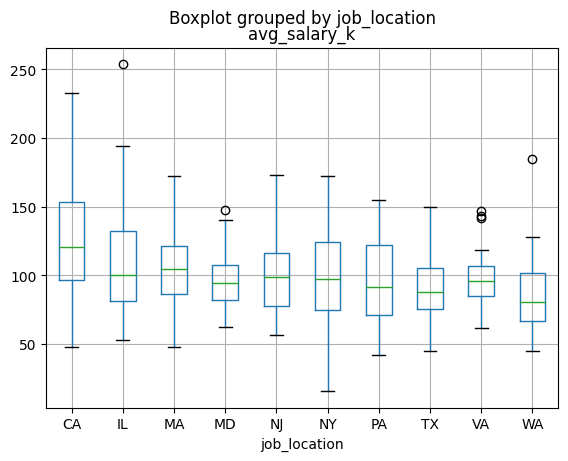

In [17]:
# draw boxplots of top states vs. salary
df[df['job_location'].isin(states_occurences[0:10].index)].boxplot(by='job_location', column='avg_salary_k')

We find that California has the largest salaries, and it occupies the largest proportion of the data. The distribution in the other states are much less distinct.
Thus, it makes sense to create a dummy variable based on if the job location is in California, or not.

In [18]:
# create California dummy variable
df['in_CA'] = (df['job_location'] == 'CA')
df.head(10)

,avg_salary_k,Rating,Size,job_location,Age,Python,visual_software,ML_software,spark,aws,excel,sql,sas,hadoop,seniority_by_title,Degree,in_CA
0,72.0,3.8,501 - 1000,NM,48,1,1,0,0,0,1,0,1,0,na,M,False
1,87.5,3.4,10000+,MD,37,1,0,0,0,0,0,0,0,0,na,M,False
2,85.0,4.8,501 - 1000,FL,11,1,0,0,1,0,1,1,1,0,na,M,False
3,76.5,3.8,1001 - 5000,WA,56,1,0,0,0,0,0,0,0,0,na,na,False
4,114.5,2.9,51 - 200,NY,23,1,0,0,0,0,1,1,1,0,na,na,False
5,95.0,3.4,201 - 500,TX,21,1,1,0,0,1,1,1,0,0,na,na,False
6,73.5,4.1,501 - 1000,MD,13,0,0,0,0,0,1,0,0,0,na,na,False
7,114.0,3.8,201 - 500,CA,16,1,0,1,1,1,1,1,0,0,na,M,True
8,61.0,3.3,10000+,NY,7,0,0,0,0,0,0,0,0,0,na,P,False
9,140.0,4.6,51 - 200,NY,12,1,0,0,1,0,0,0,0,0,na,na,False


In [25]:
# rename degree column entries
df.loc[df['Degree'] == 'M', 'Degree'] = 'MS'
df.loc[df['Degree'] == 'P', 'Degree'] = 'PHD'
df.loc[df['Degree'] == 'na', 'Degree'] = 'Other'
df.head(10)

,avg_salary_k,Rating,Size,job_location,Age,Python,visual_software,ML_software,spark,aws,excel,sql,sas,hadoop,seniority_by_title,Degree,in_CA
0,72.0,3.8,501 - 1000,NM,48,1,1,0,0,0,1,0,1,0,na,MS,False
1,87.5,3.4,10000+,MD,37,1,0,0,0,0,0,0,0,0,na,MS,False
2,85.0,4.8,501 - 1000,FL,11,1,0,0,1,0,1,1,1,0,na,MS,False
3,76.5,3.8,1001 - 5000,WA,56,1,0,0,0,0,0,0,0,0,na,Other,False
4,114.5,2.9,51 - 200,NY,23,1,0,0,0,0,1,1,1,0,na,Other,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,86.5,4.3,1001 - 5000,NY,22,0,0,0,0,1,1,1,0,0,na,MS,False
700,89.0,3.4,51 - 200,WA,-1,0,0,0,0,0,0,0,0,0,na,Other,False
716,92.0,4.0,501 - 1000,CA,15,0,0,0,0,1,1,0,0,0,sr,MS,True
732,111.0,4.1,1 - 50,CA,14,1,0,1,0,1,1,0,0,0,na,Other,True
